In [283]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

%matplotlib inline 

In [284]:
data= pd.read_csv('tc20171021.csv',error_bad_lines=False)

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_29335/3996219471.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data= pd.read_csv('tc20171021.csv',error_bad_lines=False)
b'Skipping line 297912: expected 9 fields, saw 10\nSkipping line 297913: expected 9 fields, saw 10\nSkipping line 297914: expected 9 fields, saw 10\nSkipping line 297915: expected 9 fields, saw 10\nSkipping line 297916: expected 9 fields, saw 10\nSkipping line 297917: expected 9 fields, saw 10\nSkipping line 297918: expected 9 fields, saw 10\nSkipping line 297919: expected 9 fields, saw 10\nSkipping line 297920: expected 9 fields, saw 10\nSkipping line 297921: expected 9 fields, saw 10\nSkipping line 297922: expected 9 fields, saw 10\nSkipping line 297923: expected 9 fields, saw 10\nSkipping line 297925: expected 9 fields, saw 10\nSkipping line 297926: expected 9 fields, saw 10\nSkipping line 297927: expected 

b'Skipping line 943223: expected 9 fields, saw 10\n'
b'Skipping line 1081866: expected 9 fields, saw 10\nSkipping line 1081867: expected 9 fields, saw 10\nSkipping line 1081868: expected 9 fields, saw 10\nSkipping line 1081869: expected 9 fields, saw 10\nSkipping line 1081870: expected 9 fields, saw 10\nSkipping line 1081871: expected 9 fields, saw 10\nSkipping line 1081872: expected 9 fields, saw 10\nSkipping line 1081873: expected 9 fields, saw 10\nSkipping line 1081874: expected 9 fields, saw 10\nSkipping line 1081876: expected 9 fields, saw 10\nSkipping line 1081877: expected 9 fields, saw 10\nSkipping line 1081878: expected 9 fields, saw 10\nSkipping line 1081879: expected 9 fields, saw 10\nSkipping line 1081881: expected 9 fields, saw 10\nSkipping line 1081882: expected 9 fields, saw 10\nSkipping line 1081883: expected 9 fields, saw 10\nSkipping line 1081884: expected 9 fields, saw 10\nSkipping line 1081885: expected 9 fields, saw 10\nSkipping line 1081886: expected 9 fields, saw

b'Skipping line 1153608: expected 9 fields, saw 10\nSkipping line 1156086: expected 9 fields, saw 10\nSkipping line 1156526: expected 9 fields, saw 10\nSkipping line 1156733: expected 9 fields, saw 10\nSkipping line 1156805: expected 9 fields, saw 10\nSkipping line 1157338: expected 9 fields, saw 10\nSkipping line 1157373: expected 9 fields, saw 10\nSkipping line 1157542: expected 9 fields, saw 10\nSkipping line 1157770: expected 9 fields, saw 10\nSkipping line 1157919: expected 9 fields, saw 10\nSkipping line 1157944: expected 9 fields, saw 10\nSkipping line 1157945: expected 9 fields, saw 10\nSkipping line 1157992: expected 9 fields, saw 10\nSkipping line 1158172: expected 9 fields, saw 10\nSkipping line 1158191: expected 9 fields, saw 10\nSkipping line 1158202: expected 9 fields, saw 10\nSkipping line 1158507: expected 9 fields, saw 10\nSkipping line 1158518: expected 9 fields, saw 10\nSkipping line 1158776: expected 9 fields, saw 10\nSkipping line 1158791: expected 9 fields, saw 10

In [285]:
data.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [286]:
data

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...,...
1216246,1233038,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
1216247,1233039,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
1216248,1233040,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
1216249,1233041,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [287]:
data = data.drop('Id', axis=1)

In [288]:
dataa = pd.read_csv('true_car_listings.csv')

In [289]:
dataa.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [290]:
dataa

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


## Preprocessing Data

In [291]:
df = pd.merge(data, dataa , on='Vin')

In [292]:
df

,Price_x,Year_x,Mileage_x,City_x,State_x,Vin,Make_x,Model_x,Price_y,Year_y,Mileage_y,City_y,State_y,Make_y,Model_y
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience,17316,2015,18681,Jefferson City,MO,Buick,EncoreConvenience
1,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather,18883,2015,13650,Boone,NC,Buick,EncoreLeather
2,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD,15777,2015,25195,New Orleans,LA,Buick,EncoreFWD
3,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience,15879,2015,22800,Henderson,NV,Buick,EncoreConvenience
4,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD,17471,2016,24008,Little Rock,AR,Buick,EncoreFWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,New York,NY,YV4BC0PL4H1115087,Volvo,XC90T8,63995,2017,4304,New York,NY,Volvo,XC90T8
840506,52995,2017,2474,Berwyn,PA,YV1A22MK1H1010445,Volvo,S90T6,54995,2017,2474,Berwyn,PA,Volvo,S90T6
840507,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8,80895,2017,10,Corte Madera,CA,Volvo,XC90T8
840508,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,72260,2017,3201,Englewood,NJ,Volvo,XC90T6


In [293]:
df.dtypes

Price_x       int64
Year_x        int64
Mileage_x     int64
City_x       object
State_x      object
Vin          object
Make_x       object
Model_x      object
Price_y       int64
Year_y        int64
Mileage_y     int64
City_y       object
State_y      object
Make_y       object
Model_y      object
dtype: object

In [294]:
df.describe()

,Price_x,Year_x,Mileage_x,Price_y,Year_y,Mileage_y
count,840510.000000,840510.000000,8.405100e+05,840510.000000,840510.000000,8.405100e+05
mean,21077.482621,2013.270632,5.277502e+04,21351.329954,2013.270626,5.265705e+04
std,13486.979922,3.432842,9.440697e+04,13621.110507,3.432843,4.214954e+04
min,1500.000000,1997.000000,5.000000e+00,1500.000000,1997.000000,5.000000e+00
25%,12991.000000,2012.000000,2.391400e+04,12999.000000,2012.000000,2.383300e+04
50%,17995.000000,2014.000000,4.036850e+04,18378.000000,2014.000000,4.032500e+04
75%,26594.000000,2016.000000,7.255200e+04,26984.000000,2016.000000,7.253700e+04
max,499500.000000,2018.000000,7.758776e+07,499500.000000,2018.000000,2.856196e+06


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840510 entries, 0 to 840509
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Price_x    840510 non-null  int64 
 1   Year_x     840510 non-null  int64 
 2   Mileage_x  840510 non-null  int64 
 3   City_x     840510 non-null  object
 4   State_x    840510 non-null  object
 5   Vin        840510 non-null  object
 6   Make_x     840510 non-null  object
 7   Model_x    840510 non-null  object
 8   Price_y    840510 non-null  int64 
 9   Year_y     840510 non-null  int64 
 10  Mileage_y  840510 non-null  int64 
 11  City_y     840510 non-null  object
 12  State_y    840510 non-null  object
 13  Make_y     840510 non-null  object
 14  Model_y    840510 non-null  object
dtypes: int64(6), object(9)
memory usage: 102.6+ MB


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216251 entries, 0 to 1216250
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Price    1216251 non-null  int64 
 1   Year     1216251 non-null  int64 
 2   Mileage  1216251 non-null  int64 
 3   City     1216251 non-null  object
 4   State    1216251 non-null  object
 5   Vin      1216251 non-null  object
 6   Make     1216251 non-null  object
 7   Model    1216251 non-null  object
dtypes: int64(3), object(5)
memory usage: 74.2+ MB


In [297]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [298]:
df.isnull().sum()

Price_x      0
Year_x       0
Mileage_x    0
City_x       0
State_x      0
Vin          0
Make_x       0
Model_x      0
Price_y      0
Year_y       0
Mileage_y    0
City_y       0
State_y      0
Make_y       0
Model_y      0
dtype: int64

In [299]:
df['Vin'].duplicated().sum()

47

In [393]:
df.duplicated().sum()

412

In [301]:
df = df.drop_duplicates()

In [302]:
df = df.drop_duplicates(subset=['Vin'])


In [303]:
df['State_x'].value_counts()

 TX    93298
 CA    79678
 FL    71992
 GA    39089
 IL    38318
 NC    37005
 VA    34573
 PA    27777
 NJ    27593
 NY    27361
 OH    22989
 WA    22745
 CO    22664
 AZ    22134
 TN    18609
 MA    17772
 MD    17530
 IN    16284
 MO    15948
 KY    13548
 AL    13098
 WI    11050
 MN    10818
 CT    10806
 UT    10215
 MI    10192
 OR    10158
 SC     9673
 OK     9374
 LA     8126
 KS     7745
 AR     6761
 NV     6726
 MS     6164
 NH     5598
 NE     4816
 IA     4704
 NM     4628
 ID     3428
 HI     2980
 DE     2365
 ME     1893
 MT     1881
 RI     1822
 AK     1629
 WV     1470
 SD     1223
 VT     1096
 ND     1055
 Fl      723
 WY      585
 Va      235
 Md      136
 Ga      103
 ga      103
 Az       69
 Oh       52
 Ca       31
 DC       25
Name: State_x, dtype: int64

In [304]:
state_counts_x = df['State_x'].value_counts().to_dict()
state_counts_y = df['State_y'].value_counts().to_dict()

# Replace the state_x and state_y columns with their respective value counts
df['state_x_count'] = df['State_x'].map(state_counts_x)
df['state_y_count'] = df['State_y'].map(state_counts_y)

# Drop the original state_x and state_y columns
df.drop(['State_x', 'State_y'], axis=1, inplace=True)

In [305]:
df

,Price_x,Year_x,Mileage_x,City_x,Vin,Make_x,Model_x,Price_y,Year_y,Mileage_y,City_y,Make_y,Model_y,state_x_count,state_y_count
0,16472,2015,18681,Jefferson City,KL4CJBSBXFB267643,Buick,EncoreConvenience,17316,2015,18681,Jefferson City,Buick,EncoreConvenience,15948,15922
1,16998,2015,13650,Boone,KL4CJCSB0FB264921,Buick,EncoreLeather,18883,2015,13650,Boone,Buick,EncoreLeather,37005,37010
2,15777,2015,25195,New Orleans,KL4CJASB4FB217542,Buick,EncoreFWD,15777,2015,25195,New Orleans,Buick,EncoreFWD,8126,8399
3,16784,2015,22800,Las Vegas,KL4CJBSB3FB166881,Buick,EncoreConvenience,15879,2015,22800,Henderson,Buick,EncoreConvenience,6726,6747
4,17091,2016,24008,Little Rock,KL4CJASBXGB565542,Buick,EncoreFWD,17471,2016,24008,Little Rock,Buick,EncoreFWD,6761,6767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,New York,YV4BC0PL4H1115087,Volvo,XC90T8,63995,2017,4304,New York,Volvo,XC90T8,27361,27510
840506,52995,2017,2474,Berwyn,YV1A22MK1H1010445,Volvo,S90T6,54995,2017,2474,Berwyn,Volvo,S90T6,27777,27770
840507,80895,2017,10,Corte Madera,YV4BC0ZX0H1124188,Volvo,XC90T8,80895,2017,10,Corte Madera,Volvo,XC90T8,79678,79687
840508,72260,2017,3201,Englewood,YV4A22PL3H1186162,Volvo,XC90T6,72260,2017,3201,Englewood,Volvo,XC90T6,27593,27581


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840463 entries, 0 to 840509
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Price_x        840463 non-null  int64 
 1   Year_x         840463 non-null  int64 
 2   Mileage_x      840463 non-null  int64 
 3   City_x         840463 non-null  object
 4   Vin            840463 non-null  object
 5   Make_x         840463 non-null  object
 6   Model_x        840463 non-null  object
 7   Price_y        840463 non-null  int64 
 8   Year_y         840463 non-null  int64 
 9   Mileage_y      840463 non-null  int64 
 10  City_y         840463 non-null  object
 11  Make_y         840463 non-null  object
 12  Model_y        840463 non-null  object
 13  state_x_count  840463 non-null  int64 
 14  state_y_count  840463 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 102.6+ MB


In [307]:
df['Make_x'].value_counts()

Ford             110417
Chevrolet        102236
Toyota            75566
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23243
Lexus             20641
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Ram               10422
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [308]:
df['Year_x'].value_counts()

2014    158460
2015    154194
2016    129345
2017     91602
2013     73142
2012     49763
2011     39767
2010     27535
2008     24712
2007     21169
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: Year_x, dtype: int64

In [309]:
df['Year_y'].value_counts()

2014    158459
2015    154195
2016    129344
2017     91602
2013     73142
2012     49763
2011     39767
2010     27536
2008     24712
2007     21169
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: Year_y, dtype: int64

In [310]:
df['City_x'] = df['City_x'].str.upper()


In [311]:
df['Vin'] = df['Vin'].str.upper()


In [312]:
df['Model_x'] = df['Model_x'].str.upper()


In [313]:
df['Make_x'] = df['Make_x'].str.upper()


In [314]:
df['City_y'] = df['City_y'].str.upper()


In [315]:
df['Model_y'] = df['Model_y'].str.upper()


In [316]:
df['Make_y'] = df['Make_y'].str.upper()


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840463 entries, 0 to 840509
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Price_x        840463 non-null  int64 
 1   Year_x         840463 non-null  int64 
 2   Mileage_x      840463 non-null  int64 
 3   City_x         840463 non-null  object
 4   Vin            840463 non-null  object
 5   Make_x         840463 non-null  object
 6   Model_x        840463 non-null  object
 7   Price_y        840463 non-null  int64 
 8   Year_y         840463 non-null  int64 
 9   Mileage_y      840463 non-null  int64 
 10  City_y         840463 non-null  object
 11  Make_y         840463 non-null  object
 12  Model_y        840463 non-null  object
 13  state_x_count  840463 non-null  int64 
 14  state_y_count  840463 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 102.6+ MB


In [318]:
df

,Price_x,Year_x,Mileage_x,City_x,Vin,Make_x,Model_x,Price_y,Year_y,Mileage_y,City_y,Make_y,Model_y,state_x_count,state_y_count
0,16472,2015,18681,JEFFERSON CITY,KL4CJBSBXFB267643,BUICK,ENCORECONVENIENCE,17316,2015,18681,JEFFERSON CITY,BUICK,ENCORECONVENIENCE,15948,15922
1,16998,2015,13650,BOONE,KL4CJCSB0FB264921,BUICK,ENCORELEATHER,18883,2015,13650,BOONE,BUICK,ENCORELEATHER,37005,37010
2,15777,2015,25195,NEW ORLEANS,KL4CJASB4FB217542,BUICK,ENCOREFWD,15777,2015,25195,NEW ORLEANS,BUICK,ENCOREFWD,8126,8399
3,16784,2015,22800,LAS VEGAS,KL4CJBSB3FB166881,BUICK,ENCORECONVENIENCE,15879,2015,22800,HENDERSON,BUICK,ENCORECONVENIENCE,6726,6747
4,17091,2016,24008,LITTLE ROCK,KL4CJASBXGB565542,BUICK,ENCOREFWD,17471,2016,24008,LITTLE ROCK,BUICK,ENCOREFWD,6761,6767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,NEW YORK,YV4BC0PL4H1115087,VOLVO,XC90T8,63995,2017,4304,NEW YORK,VOLVO,XC90T8,27361,27510
840506,52995,2017,2474,BERWYN,YV1A22MK1H1010445,VOLVO,S90T6,54995,2017,2474,BERWYN,VOLVO,S90T6,27777,27770
840507,80895,2017,10,CORTE MADERA,YV4BC0ZX0H1124188,VOLVO,XC90T8,80895,2017,10,CORTE MADERA,VOLVO,XC90T8,79678,79687
840508,72260,2017,3201,ENGLEWOOD,YV4A22PL3H1186162,VOLVO,XC90T6,72260,2017,3201,ENGLEWOOD,VOLVO,XC90T6,27593,27581


In [319]:
a = df['Make_x']==df['Make_y']

In [320]:
a.value_counts()

True    840463
dtype: int64

In [321]:
a = df['Model_x']==df['Model_y']

In [322]:
a.value_counts()

True     784036
False     56427
dtype: int64

In [323]:
d_model= df[df['Model_x']==df['Model_y']]

In [324]:
d_model

,Price_x,Year_x,Mileage_x,City_x,Vin,Make_x,Model_x,Price_y,Year_y,Mileage_y,City_y,Make_y,Model_y,state_x_count,state_y_count
0,16472,2015,18681,JEFFERSON CITY,KL4CJBSBXFB267643,BUICK,ENCORECONVENIENCE,17316,2015,18681,JEFFERSON CITY,BUICK,ENCORECONVENIENCE,15948,15922
1,16998,2015,13650,BOONE,KL4CJCSB0FB264921,BUICK,ENCORELEATHER,18883,2015,13650,BOONE,BUICK,ENCORELEATHER,37005,37010
2,15777,2015,25195,NEW ORLEANS,KL4CJASB4FB217542,BUICK,ENCOREFWD,15777,2015,25195,NEW ORLEANS,BUICK,ENCOREFWD,8126,8399
3,16784,2015,22800,LAS VEGAS,KL4CJBSB3FB166881,BUICK,ENCORECONVENIENCE,15879,2015,22800,HENDERSON,BUICK,ENCORECONVENIENCE,6726,6747
4,17091,2016,24008,LITTLE ROCK,KL4CJASBXGB565542,BUICK,ENCOREFWD,17471,2016,24008,LITTLE ROCK,BUICK,ENCOREFWD,6761,6767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,NEW YORK,YV4BC0PL4H1115087,VOLVO,XC90T8,63995,2017,4304,NEW YORK,VOLVO,XC90T8,27361,27510
840506,52995,2017,2474,BERWYN,YV1A22MK1H1010445,VOLVO,S90T6,54995,2017,2474,BERWYN,VOLVO,S90T6,27777,27770
840507,80895,2017,10,CORTE MADERA,YV4BC0ZX0H1124188,VOLVO,XC90T8,80895,2017,10,CORTE MADERA,VOLVO,XC90T8,79678,79687
840508,72260,2017,3201,ENGLEWOOD,YV4A22PL3H1186162,VOLVO,XC90T6,72260,2017,3201,ENGLEWOOD,VOLVO,XC90T6,27593,27581


In [325]:
a= d_model['Year_x']==d_model['Year_y']

In [326]:
a.value_counts()

True    784036
dtype: int64

In [327]:
d_model = d_model.drop(["Make_y","Model_y","Year_y",], axis=1)

In [328]:
d_model

,Price_x,Year_x,Mileage_x,City_x,Vin,Make_x,Model_x,Price_y,Mileage_y,City_y,state_x_count,state_y_count
0,16472,2015,18681,JEFFERSON CITY,KL4CJBSBXFB267643,BUICK,ENCORECONVENIENCE,17316,18681,JEFFERSON CITY,15948,15922
1,16998,2015,13650,BOONE,KL4CJCSB0FB264921,BUICK,ENCORELEATHER,18883,13650,BOONE,37005,37010
2,15777,2015,25195,NEW ORLEANS,KL4CJASB4FB217542,BUICK,ENCOREFWD,15777,25195,NEW ORLEANS,8126,8399
3,16784,2015,22800,LAS VEGAS,KL4CJBSB3FB166881,BUICK,ENCORECONVENIENCE,15879,22800,HENDERSON,6726,6747
4,17091,2016,24008,LITTLE ROCK,KL4CJASBXGB565542,BUICK,ENCOREFWD,17471,24008,LITTLE ROCK,6761,6767
...,...,...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,NEW YORK,YV4BC0PL4H1115087,VOLVO,XC90T8,63995,4304,NEW YORK,27361,27510
840506,52995,2017,2474,BERWYN,YV1A22MK1H1010445,VOLVO,S90T6,54995,2474,BERWYN,27777,27770
840507,80895,2017,10,CORTE MADERA,YV4BC0ZX0H1124188,VOLVO,XC90T8,80895,10,CORTE MADERA,79678,79687
840508,72260,2017,3201,ENGLEWOOD,YV4A22PL3H1186162,VOLVO,XC90T6,72260,3201,ENGLEWOOD,27593,27581


In [329]:
a= d_model['Mileage_x']==d_model['Mileage_y']

In [330]:
a.value_counts()

True     735163
False     48873
dtype: int64

In [331]:
a

0          True
1          True
2          True
3          True
4          True
          ...  
840505    False
840506     True
840507     True
840508     True
840509    False
Length: 784036, dtype: bool

In [332]:
a= d_model['City_x']==d_model['City_y']

In [333]:
a.value_counts()

True     769249
False     14787
dtype: int64

In [334]:
d_same= d_model [d_model['City_x']==d_model['City_y']]

In [335]:
d_same = d_same.drop(['Vin','City_y'], axis=1)

In [336]:
d_same

,Price_x,Year_x,Mileage_x,City_x,Make_x,Model_x,Price_y,Mileage_y,state_x_count,state_y_count
0,16472,2015,18681,JEFFERSON CITY,BUICK,ENCORECONVENIENCE,17316,18681,15948,15922
1,16998,2015,13650,BOONE,BUICK,ENCORELEATHER,18883,13650,37005,37010
2,15777,2015,25195,NEW ORLEANS,BUICK,ENCOREFWD,15777,25195,8126,8399
4,17091,2016,24008,LITTLE ROCK,BUICK,ENCOREFWD,17471,24008,6761,6767
5,16995,2015,8624,PUNTA GORDA,BUICK,ENCORECONVENIENCE,18762,8624,71992,71759
...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,NEW YORK,VOLVO,XC90T8,63995,4304,27361,27510
840506,52995,2017,2474,BERWYN,VOLVO,S90T6,54995,2474,27777,27770
840507,80895,2017,10,CORTE MADERA,VOLVO,XC90T8,80895,10,79678,79687
840508,72260,2017,3201,ENGLEWOOD,VOLVO,XC90T6,72260,3201,27593,27581


In [337]:
d_same.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769249 entries, 0 to 840509
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Price_x        769249 non-null  int64 
 1   Year_x         769249 non-null  int64 
 2   Mileage_x      769249 non-null  int64 
 3   City_x         769249 non-null  object
 4   Make_x         769249 non-null  object
 5   Model_x        769249 non-null  object
 6   Price_y        769249 non-null  int64 
 7   Mileage_y      769249 non-null  int64 
 8   state_x_count  769249 non-null  int64 
 9   state_y_count  769249 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 64.6+ MB


In [338]:
d_same=d_same.rename(columns={"Model_x":"Model"})

In [339]:
d_same=d_same.rename(columns={"City_x":"City"})

In [340]:
d_same=d_same.rename(columns={"Make_x":"Make"})

In [341]:
d_same=d_same.rename(columns={"Year_x":"Year"})

In [342]:
d_same

,Price_x,Year,Mileage_x,City,Make,Model,Price_y,Mileage_y,state_x_count,state_y_count
0,16472,2015,18681,JEFFERSON CITY,BUICK,ENCORECONVENIENCE,17316,18681,15948,15922
1,16998,2015,13650,BOONE,BUICK,ENCORELEATHER,18883,13650,37005,37010
2,15777,2015,25195,NEW ORLEANS,BUICK,ENCOREFWD,15777,25195,8126,8399
4,17091,2016,24008,LITTLE ROCK,BUICK,ENCOREFWD,17471,24008,6761,6767
5,16995,2015,8624,PUNTA GORDA,BUICK,ENCORECONVENIENCE,18762,8624,71992,71759
...,...,...,...,...,...,...,...,...,...,...
840505,63995,2017,4305,NEW YORK,VOLVO,XC90T8,63995,4304,27361,27510
840506,52995,2017,2474,BERWYN,VOLVO,S90T6,54995,2474,27777,27770
840507,80895,2017,10,CORTE MADERA,VOLVO,XC90T8,80895,10,79678,79687
840508,72260,2017,3201,ENGLEWOOD,VOLVO,XC90T6,72260,3201,27593,27581


In [343]:
df = d_same.sort_values(by='Year')

In [344]:
df

,Price_x,Year,Mileage_x,City,Make,Model,Price_y,Mileage_y,state_x_count,state_y_count
538438,4950,1997,100557,MILACA,FORD,F-1504WD,4950,100557,10818,10819
451134,3998,1997,130613,TEXARKANA,CHEVROLET,CAMARO2DR,4998,130613,93298,93090
721808,5995,1997,78149,HONOLULU,MERCURY,MOUNTAINEER4DR,5995,78149,2980,2979
817839,3198,1997,250824,COMMERCE CITY,TOYOTA,AVALON4DR,3198,250824,22664,22649
171150,6799,1997,62404,MONTEREY PARK,BMW,3,6799,62404,79678,79687
...,...,...,...,...,...,...,...,...,...,...
173079,51740,2018,10,GRAPEVINE,AUDI,A5,51740,10,93298,93090
122468,24339,2018,3251,WESTMINSTER,CHEVROLET,EQUINOXAWD,24339,3251,17530,17368
713764,38395,2018,10,FAYETTEVILLE,MERCEDES-BENZ,GLAGLA,38395,10,37005,37010
594612,19012,2018,24,PHOENIX,HONDA,FITSPORT,19012,24,22134,22131


In [345]:
df['Year'].value_counts()

2014    146391
2015    141856
2016    117805
2017     84872
2013     67683
2012     44955
2011     35884
2010     24491
2008     22276
2007     19040
2009     17308
2006     13579
2005      9979
2004      7301
2003      5090
2002      3365
2001      2351
2000      1733
1999      1130
2018       920
1998       711
1997       529
Name: Year, dtype: int64

In [346]:
df.columns


Index(['Price_x', 'Year', 'Mileage_x', 'City', 'Make', 'Model', 'Price_y',
       'Mileage_y', 'state_x_count', 'state_y_count'],
      dtype='object')

## Feature Engineering

In [347]:


# create a new column for mileage level
df['Usage Level_x'] = pd.cut(df['Mileage_x'], bins=[0, 50000, 100000, float('inf')], labels=['Low', 'Medium', 'High'])

# view the new column
print(df['Usage Level_x'])


538438      High
451134      High
721808    Medium
817839      High
171150    Medium
           ...  
173079       Low
122468       Low
713764       Low
594612       Low
442853       Low
Name: Usage Level_x, Length: 769249, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [348]:
# Convert Usage Level to numerical feature
df['Usage Level_x'] = df['Usage Level_x'].replace({'Low': 1, 'Medium': 2, 'High': 3})


In [349]:


# create a new column for mileage level
df['Usage Level_y'] = pd.cut(df['Mileage_y'], bins=[0, 50000, 100000, float('inf')], labels=['Low', 'Medium', 'High'])

# view the new column
print(df['Usage Level_y'])


538438      High
451134      High
721808    Medium
817839      High
171150    Medium
           ...  
173079       Low
122468       Low
713764       Low
594612       Low
442853       Low
Name: Usage Level_y, Length: 769249, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [350]:
df['Usage Level_y'] = df['Usage Level_y'].replace({'Low': 1, 'Medium': 2, 'High': 3})


In [351]:
df

,Price_x,Year,Mileage_x,City,Make,Model,Price_y,Mileage_y,state_x_count,state_y_count,Usage Level_x,Usage Level_y
538438,4950,1997,100557,MILACA,FORD,F-1504WD,4950,100557,10818,10819,3,3
451134,3998,1997,130613,TEXARKANA,CHEVROLET,CAMARO2DR,4998,130613,93298,93090,3,3
721808,5995,1997,78149,HONOLULU,MERCURY,MOUNTAINEER4DR,5995,78149,2980,2979,2,2
817839,3198,1997,250824,COMMERCE CITY,TOYOTA,AVALON4DR,3198,250824,22664,22649,3,3
171150,6799,1997,62404,MONTEREY PARK,BMW,3,6799,62404,79678,79687,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
173079,51740,2018,10,GRAPEVINE,AUDI,A5,51740,10,93298,93090,1,1
122468,24339,2018,3251,WESTMINSTER,CHEVROLET,EQUINOXAWD,24339,3251,17530,17368,1,1
713764,38395,2018,10,FAYETTEVILLE,MERCEDES-BENZ,GLAGLA,38395,10,37005,37010,1,1
594612,19012,2018,24,PHOENIX,HONDA,FITSPORT,19012,24,22134,22131,1,1


In [352]:
aa= df['Usage Level_y'] == df['Usage Level_x']

In [353]:
aa.value_counts()

True     768907
False       342
dtype: int64

In [354]:
df = df[df['Usage Level_y'] == df['Usage Level_x']]

In [355]:
df = df.drop('Usage Level_y', axis=1)

In [356]:
df=df.rename(columns={"Usage Level_x":"Usage Level"})

In [357]:
import datetime

current_year = datetime.datetime.now().year

df['Age'] = current_year - df['Year']

df['Car_Category'] = pd.cut(df['Age'], bins=[0, 3, 7, np.inf], labels=['New', 'Used', 'Old'])


In [358]:
df['Car_Category'].value_counts()

Old     565367
Used    203540
New          0
Name: Car_Category, dtype: int64

In [359]:
df['Car_Category'] = df['Car_Category'].replace({'New': 1, 'Used': 2, 'Old': 3})


In [360]:
df.columns

Index(['Price_x', 'Year', 'Mileage_x', 'City', 'Make', 'Model', 'Price_y',
       'Mileage_y', 'state_x_count', 'state_y_count', 'Usage Level', 'Age',
       'Car_Category'],
      dtype='object')

## Features Plots

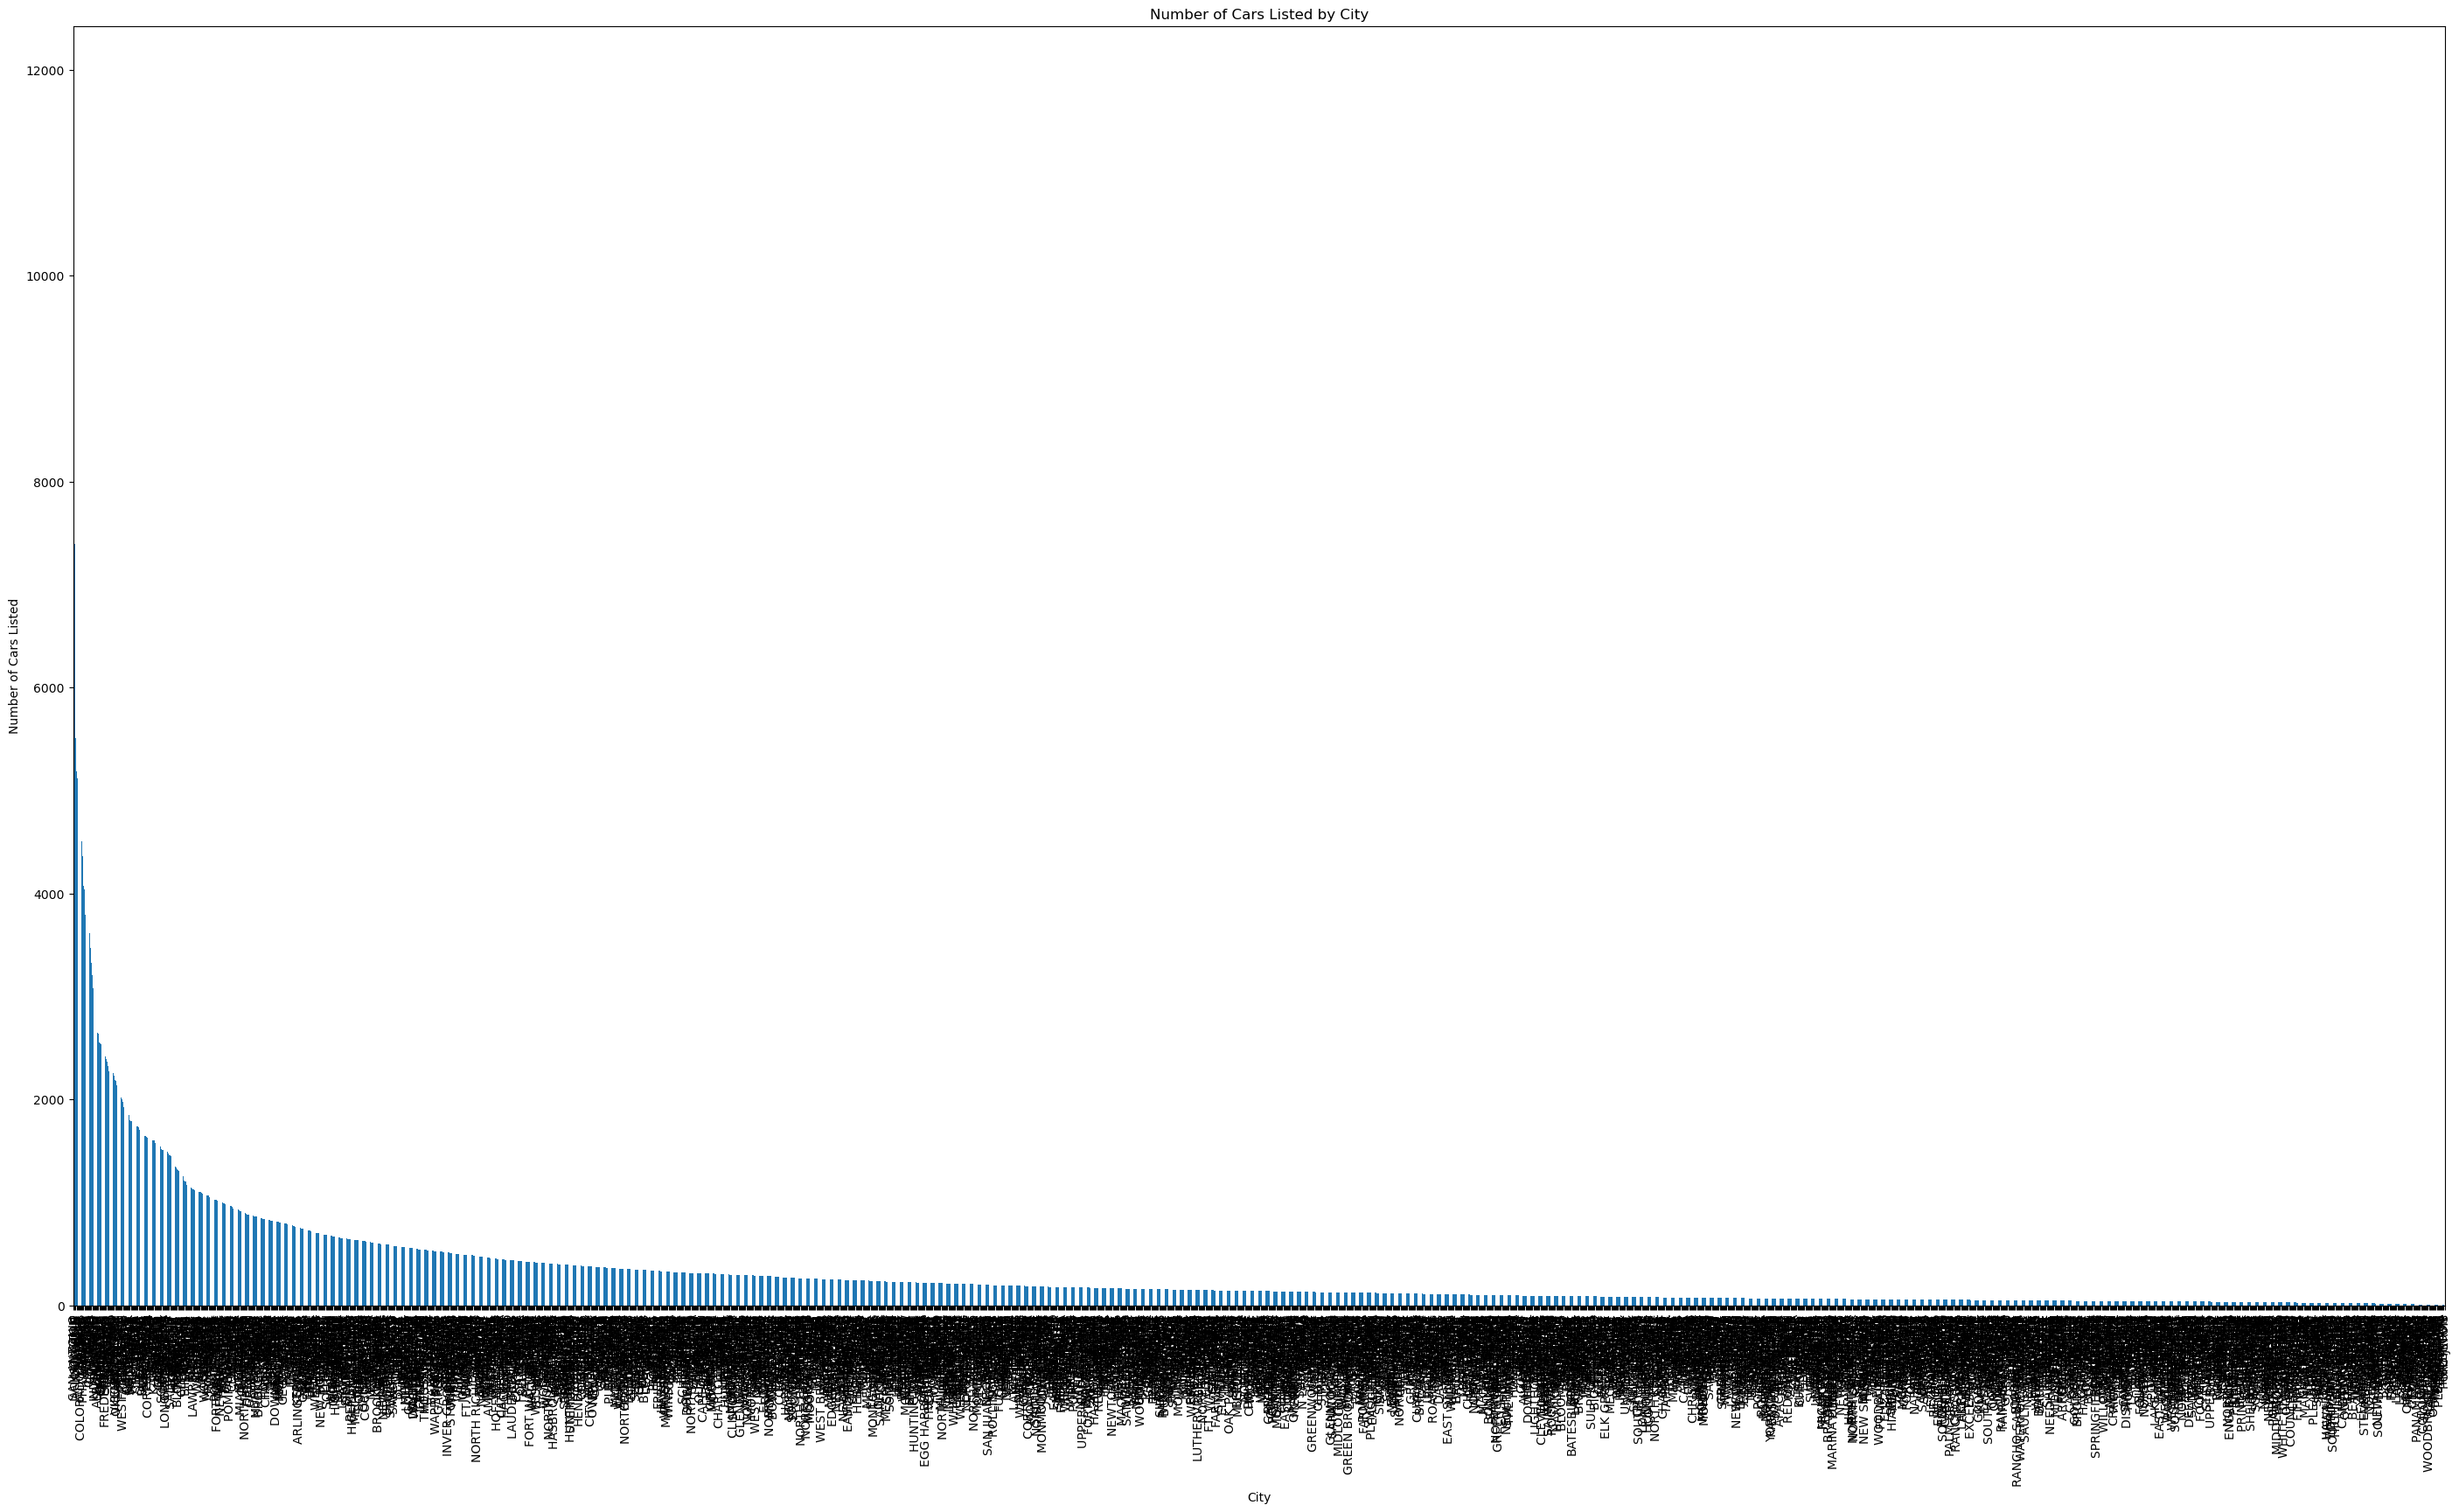

In [401]:
#City Importance
import matplotlib.pyplot as plt

# create a bar chart of the number of cars listed in each city
df['City'].value_counts().plot(kind='bar', figsize=(35,19))

# set the title and axis labels
plt.title('Number of Cars Listed by City')
plt.xlabel('City')
plt.ylabel('Number of Cars Listed')

# display the chart
plt.show()


In [368]:
# Price distribution:histogram plot to show the distribution of car prices 

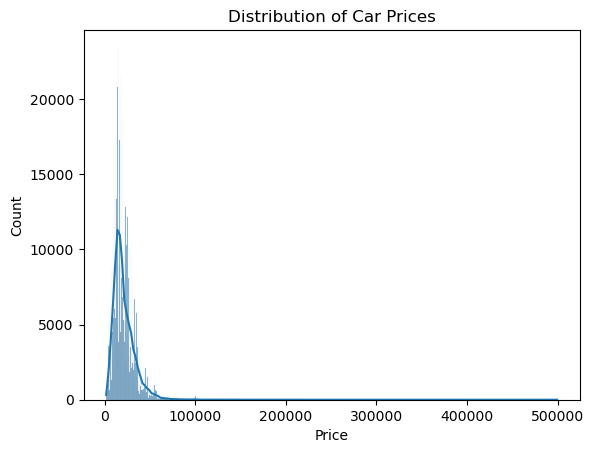

In [369]:
import seaborn as sns

sns.histplot(df['Price_x'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()


In [370]:
#Mileage distribution:  histogram  to show the distribution of car mileage 
    

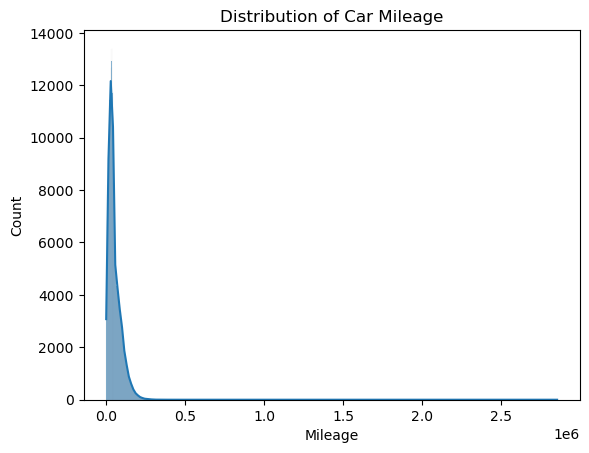

In [371]:
sns.histplot(df['Mileage_x'], kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.show()


In [372]:
# Make and model counts:  bar chart to show the number of cars for each make and model. 


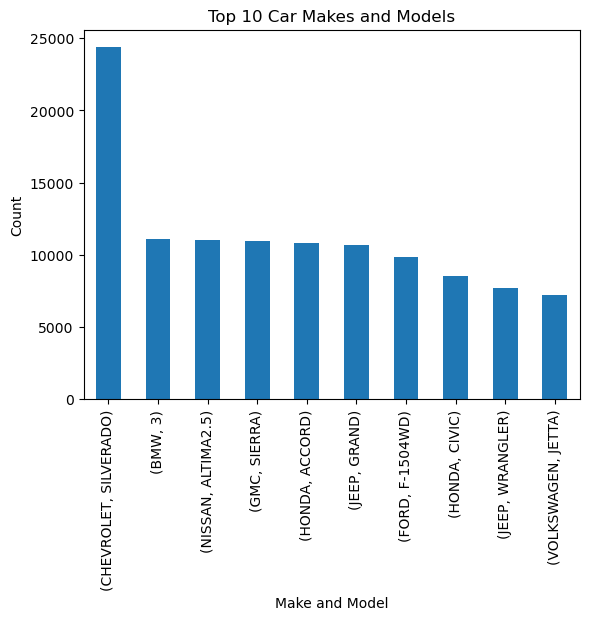

In [373]:
df.groupby(['Make', 'Model']).size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Car Makes and Models')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.show()


In [374]:
#Price vs. mileage scatter plot:  scatter plot to show the relationship between car price and mileage.


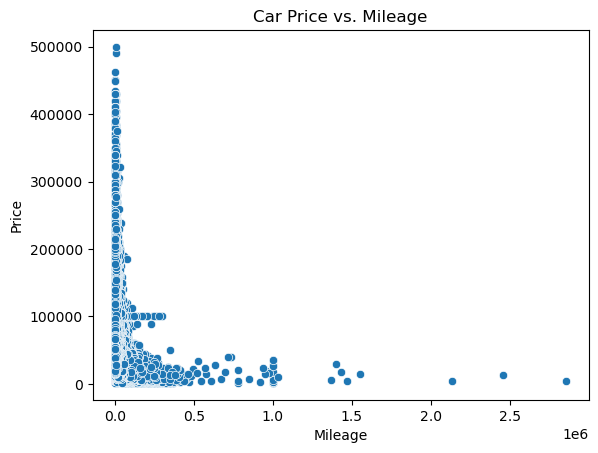

In [375]:
sns.scatterplot(data=df, x='Mileage_x', y='Price_x')
plt.title('Car Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


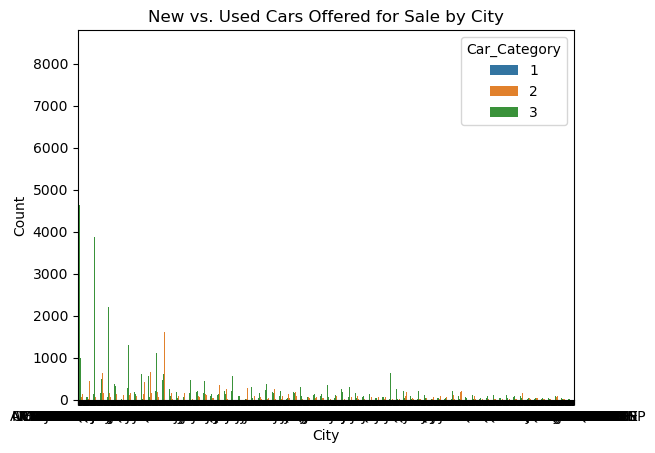

In [376]:
#5.1 Is the distribution of the offered cars differs from the new and old ones according to the city of the seller?
# bar chart that shows the number of new and old cars offered for sale in each city.
sns.countplot(data=df, x='City', hue='Car_Category')
plt.title('New vs. Used Cars Offered for Sale by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


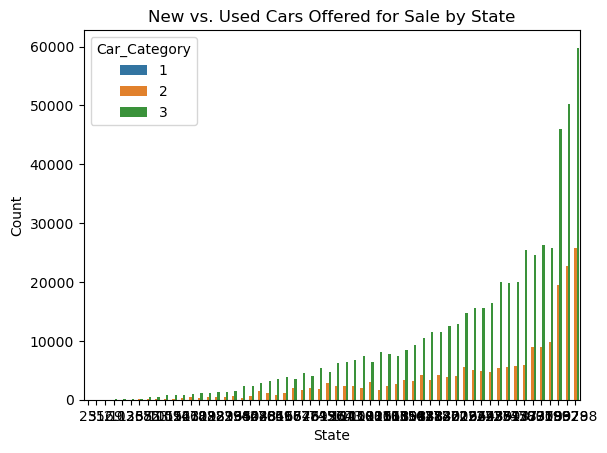

In [377]:
#5.2 Is the distribution of the offered cars differs from the new and old ones according to the State of the seller?

#bar chart that shows the number of new and old cars offered for sale in each state.
sns.countplot(data=df, x='state_x_count', hue='Car_Category')
plt.title('New vs. Used Cars Offered for Sale by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


In [378]:
df.columns

Index(['Price_x', 'Year', 'Mileage_x', 'City', 'Make', 'Model', 'Price_y',
       'Mileage_y', 'state_x_count', 'state_y_count', 'Usage Level', 'Age',
       'Car_Category'],
      dtype='object')

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


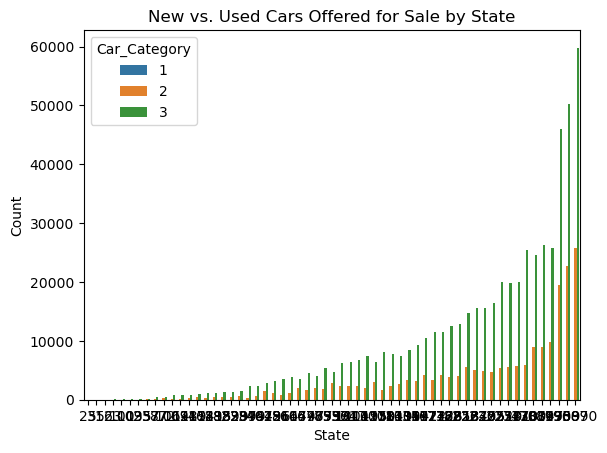

In [403]:
sns.countplot(data=df, x='state_y_count', hue='Car_Category')
plt.title('New vs. Used Cars Offered for Sale by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

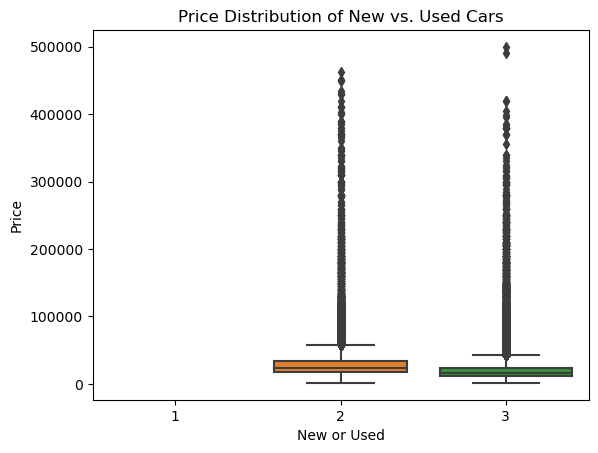

In [380]:
#5.3 Is There is any differences in the Price between the old and the new cars?

#box plot that shows the distribution of prices for new and used cars.
sns.boxplot(data=df, x='Car_Category', y='Price_x')
plt.title('Price Distribution of New vs. Used Cars')
plt.xlabel('New or Used')
plt.ylabel('Price')
plt.show()


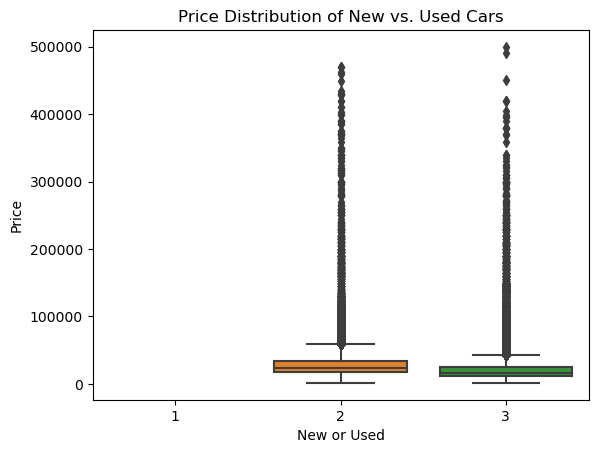

In [381]:
sns.boxplot(data=df, x='Car_Category', y='Price_y')
plt.title('Price Distribution of New vs. Used Cars')
plt.xlabel('New or Used')
plt.ylabel('Price')
plt.show()

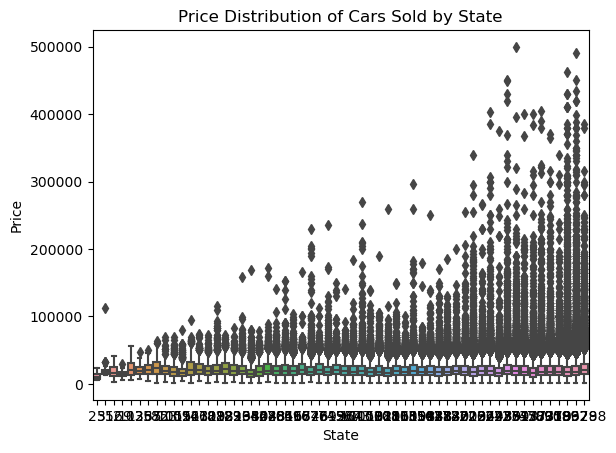

In [382]:
#5.4 The Price of the car affected by the State of the seller?

#box plot that shows the distribution of prices for cars sold in each state.
sns.boxplot(data=df, x='state_x_count', y='Price_x')
plt.title('Price Distribution of Cars Sold by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()


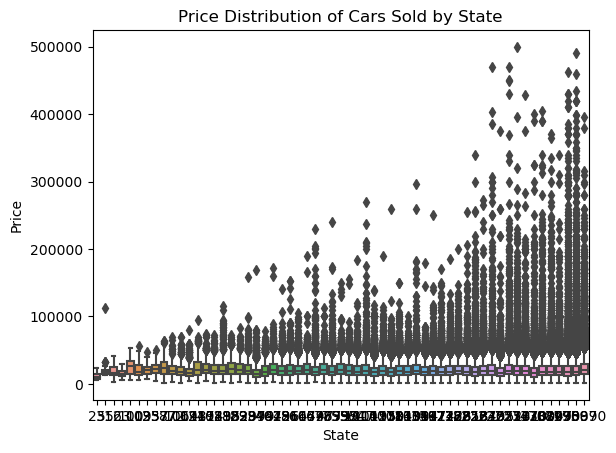

In [383]:
sns.boxplot(data=df, x='state_y_count', y='Price_y')
plt.title('Price Distribution of Cars Sold by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()


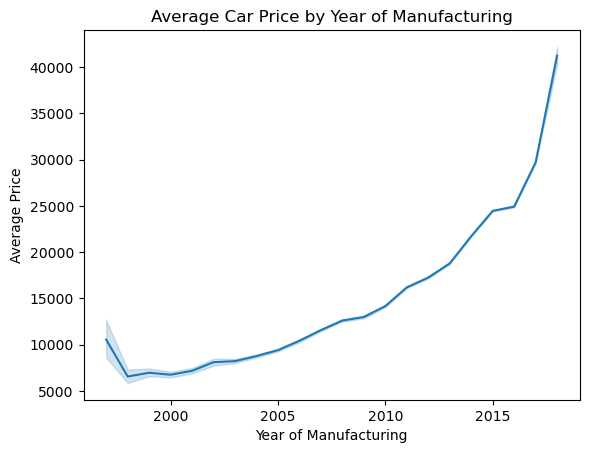

In [384]:
#5.5 How the Prices of the cars are changed according to the year of manufacturing?

#line plot that shows the average price of cars for each year of manufacturing.
sns.lineplot(data=df, x='Year', y='Price_x', estimator='mean')
plt.title('Average Car Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price')
plt.show()


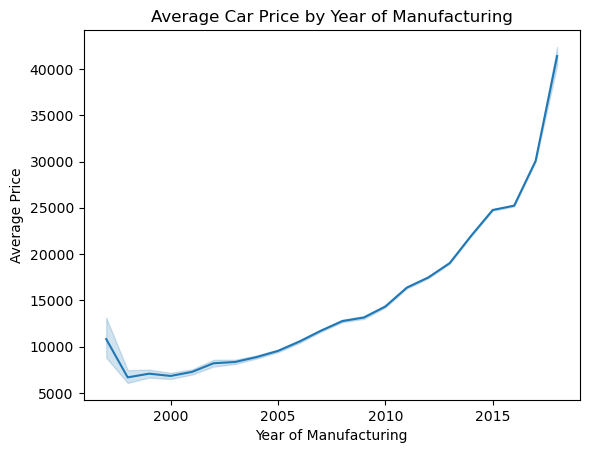

In [385]:
sns.lineplot(data=df, x='Year', y='Price_y', estimator='mean')
plt.title('Average Car Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price')
plt.show()


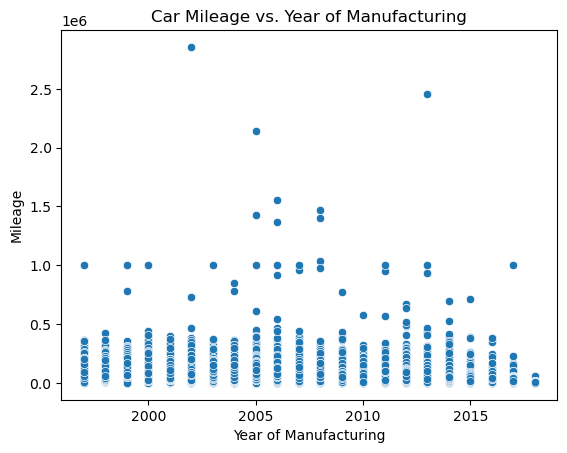

In [386]:
#5.6 There is any relation between the Year and the Milage?

#scatter plot that shows the relationship between car mileage and year of manufacturing.
sns.scatterplot(data=df, x='Year', y='Mileage_x')
plt.title('Car Mileage vs. Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Mileage')
plt.show()


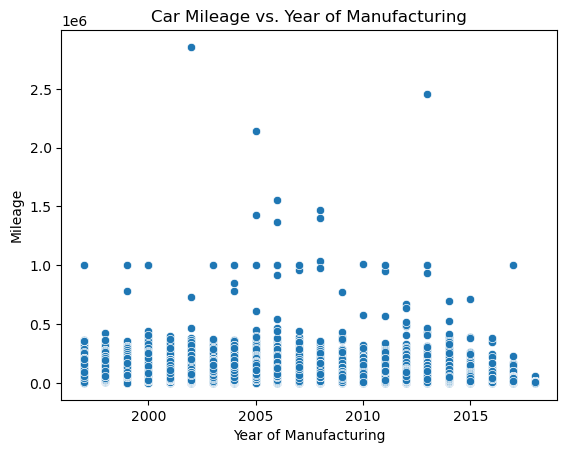

In [387]:
sns.scatterplot(data=df, x='Year', y='Mileage_y')
plt.title('Car Mileage vs. Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Mileage')
plt.show()

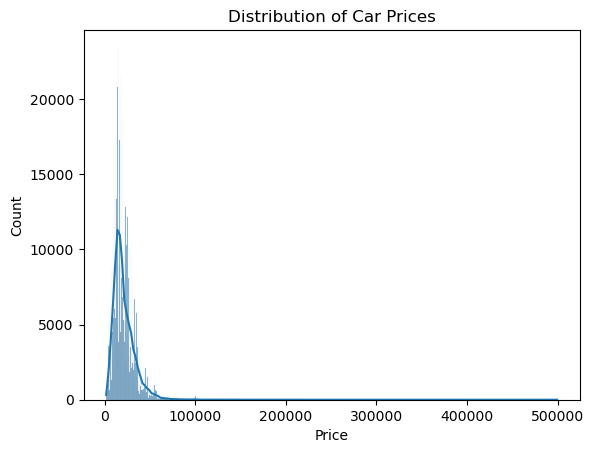

In [388]:
#5.7 What is the distribution of the cars in the market?

#histogram or a density plot that shows the distribution of car prices.
sns.histplot(data=df, x='Price_x', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()


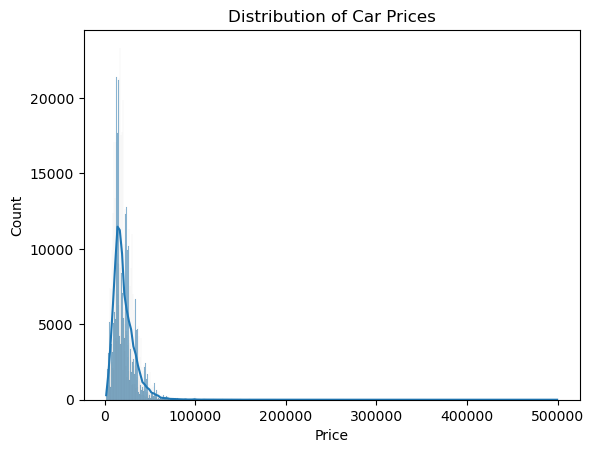

In [389]:
sns.histplot(data=df, x='Price_y', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()


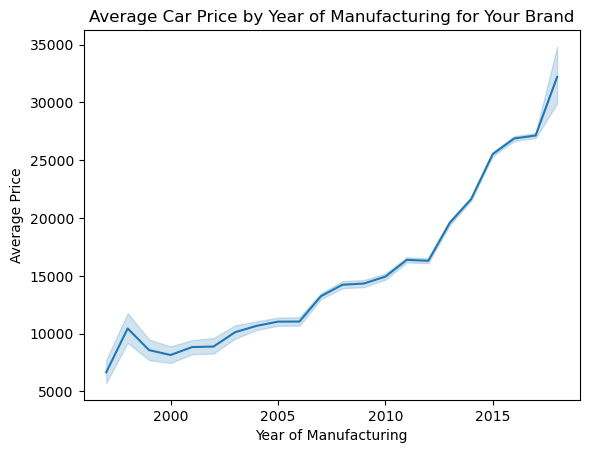

In [390]:
#5.8 How the Price of a certain brand cars' changes according the year of manufacturing?

#line plot that shows the average price of cars for a certain brand over time.
sns.lineplot(data=df[df['Make'] == 'CHEVROLET'], x='Year', y='Price_x', estimator='mean')
plt.title('Average Car Price by Year of Manufacturing for Your Brand')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price')
plt.show()


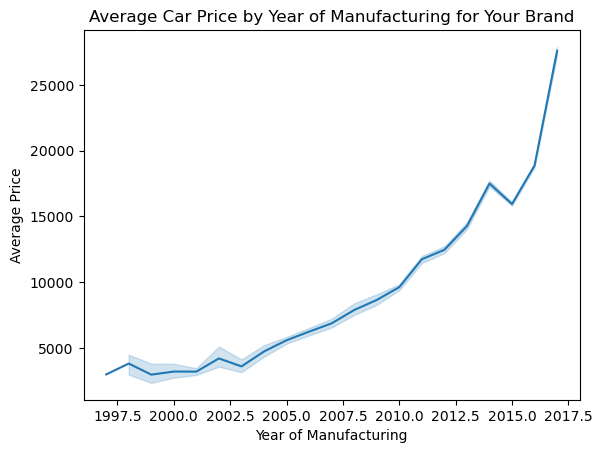

In [391]:
sns.lineplot(data=df[df['Make'] == 'CHRYSLER'], x='Year', y='Price_x', estimator='mean')
plt.title('Average Car Price by Year of Manufacturing for Your Brand')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price')
plt.show()

In [392]:
df['Make'].value_counts()

CHEVROLET        99509
FORD             88286
NISSAN           64170
TOYOTA           61015
HONDA            41320
JEEP             37802
HYUNDAI          34579
DODGE            33578
BMW              32415
GMC              28436
MERCEDES-BENZ    25893
KIA              24966
VOLKSWAGEN       22748
LEXUS            14855
SUBARU           14766
CADILLAC         14749
CHRYSLER         14722
MAZDA            13122
AUDI             12618
BUICK            12205
INFINITI         11978
ACURA            11049
RAM              10088
LINCOLN           6971
VOLVO             4959
MINI              4283
PORSCHE           4025
LAND              4020
MITSUBISHI        3995
SCION             2953
JAGUAR            2152
PONTIAC           1768
FIAT              1751
MERCURY           1067
MASERATI          1036
SATURN             958
HUMMER             928
SMART              703
BENTLEY            367
FERRARI            343
SUZUKI             332
SAAB               258
TESLA              230
ASTON      

In [404]:
df.duplicated().sum()

412

In [405]:
df = df.drop_duplicates()

In [406]:
df.isnull().sum()

Price_x          0
Year             0
Mileage_x        0
City             0
Make             0
Model            0
Price_y          0
Mileage_y        0
state_x_count    0
state_y_count    0
Usage Level      0
Age              0
Car_Category     0
dtype: int64

In [407]:
# Still have to remove outliers 